Analisi Esplorativa

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [2]:
# Caricamento dataset
song_df_1 = pd.read_csv('triplets_file.csv')
song_df_1.columns = ['user_id', 'song_id', 'listen_count']

song_df_2 =  pd.read_csv('song_data.csv')
song_df_2.drop_duplicates(['song_id'], inplace=True)


songs_df = pd.merge(song_df_1, song_df_2, on="song_id", how="left")

In [3]:
# Totale osservazioni
print(f"There are {songs_df.shape[0]} observations in the dataset")

There are 2000000 observations in the dataset


In [4]:
songs_df.isnull().sum()

user_id         0
song_id         0
listen_count    0
title           0
release         0
artist_name     0
year            0
dtype: int64

In [5]:
unique_songs = songs_df['title'].unique().shape[0]
unique_songs

9567

In [6]:
unique_artists = songs_df['artist_name'].unique().shape[0]
unique_artists

3375

In [7]:
unique_users = songs_df['user_id'].unique().shape[0]
unique_users

76353

In [8]:
ten_top_songs = songs_df.groupby('title').count().reset_index().sort_values(['listen_count'], ascending = False)
ten_top_songs['percentage']  = round(ten_top_songs['listen_count'].div(ten_top_songs['listen_count'].sum())*100, 2)

In [9]:
ten_top_songs.head(10)

,title,user_id,song_id,listen_count,release,artist_name,year,percentage
6836,Sehr kosmisch,8277,8277,8277,8277,8277,8277,0.41
8725,Undo,7032,7032,7032,7032,7032,7032,0.35
1964,Dog Days Are Over (Radio Edit),6949,6949,6949,6949,6949,6949,0.35
9496,You're The One,6729,6729,6729,6729,6729,6729,0.34
6498,Revelry,6145,6145,6145,6145,6145,6145,0.31
6825,Secrets,5841,5841,5841,5841,5841,5841,0.29
3437,Horn Concerto No. 4 in E flat K495: II. Romanc...,5385,5385,5385,5385,5385,5385,0.27
2595,Fireflies,4795,4795,4795,4795,4795,4795,0.24
3322,Hey_ Soul Sister,4758,4758,4758,4758,4758,4758,0.24
8494,Tive Sim,4548,4548,4548,4548,4548,4548,0.23


In [10]:
matplotlib.rcParams.update({# Use mathtext, not LaTeX
                            'text.usetex': False,
                            # Use the Computer modern font
                            'font.family': 'serif',
                            'font.serif': 'cmr10',
                            'mathtext.fontset': 'cm',
                            })

C:\Users\Giuseppe\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 233 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Giuseppe\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Giuseppe\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 25 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Giuseppe\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 231 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Giuseppe\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 227 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Giuseppe\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 209 missing f

C:\Users\Giuseppe\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 220 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Giuseppe\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 239 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Giuseppe\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 223 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Giuseppe\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 224 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Giuseppe\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 253 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Giuseppe\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 235 missing from curre

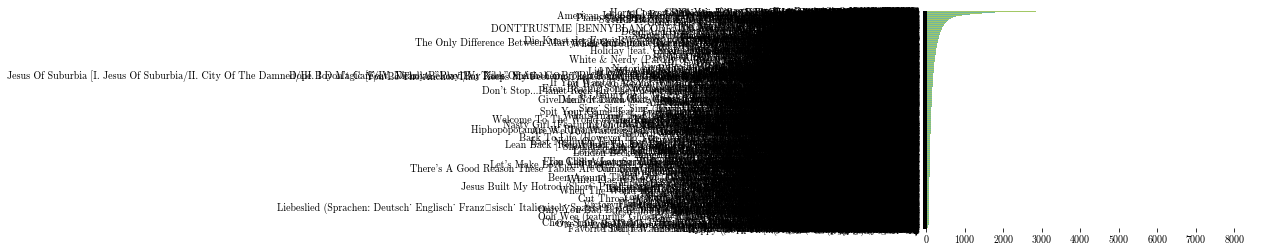

In [11]:
plt.figure()
labels = ten_top_songs['title'].tolist()
counts = ten_top_songs['listen_count'].tolist()
sns.barplot(x=counts, y=labels, palette='Set2')
sns.despine(left=True, bottom=True)

In [12]:
ten_top_artists  = songs_df.groupby(['artist_name'])['listen_count'].count().reset_index().sort_values(['listen_count', 'artist_name'], ascending = False)

In [13]:
ten_top_artists = ten_top_artists[:10]
ten_top_artists

,artist_name,listen_count
649,Coldplay,29422
2850,The Black Keys,19862
1651,Kings Of Leon,18747
1107,Florence + The Machine,18112
1370,Jack Johnson,17801
2946,The Killers,16063
2374,Radiohead,14890
736,Daft Punk,14715
2073,Muse,14005
1554,Justin Bieber,13959


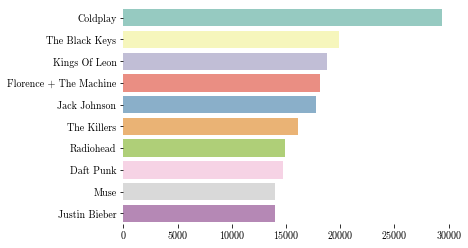

In [14]:
plt.figure()
labels = ten_top_artists['artist_name'].tolist()
counts = ten_top_artists['listen_count'].tolist()
sns.barplot(x=counts, y=labels, palette='Set3')
sns.despine(left=True, bottom=True)

In [15]:
listen_counts = pd.DataFrame(songs_df.groupby('listen_count').size(), columns=['count'])

In [16]:
# Numero massimo di ascolti ripetuti per una canzone da un singolo utente
repeated_listens = listen_counts.reset_index(drop=False)['listen_count'].iloc[-1]
repeated_listens

2213

In [17]:
# Numero medio di volte in cui un utente ascolta la stessa canzone
user_mean = songs_df['listen_count'].mean()
user_mean

3.0454845

In [18]:
# Numero di volte in cui un utente ascolta la stessa canzone
listen_counts_reap = listen_counts[listen_counts['count'] > 50].reset_index(drop=False)
listen_counts_reap

,listen_count,count
0,1,1138433
1,2,313043
2,3,142933
3,4,82569
4,5,93136
...,...,...
73,74,64
74,75,67
75,76,55
76,77,60


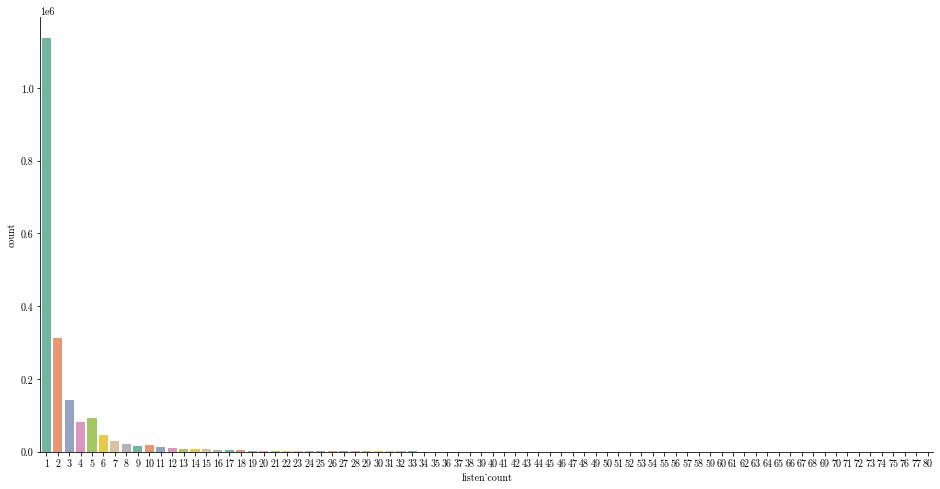

In [19]:
plt.figure(figsize=(16, 8))
sns.barplot(x='listen_count', y='count', palette='Set2', data=listen_counts_reap )
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show();

In [20]:
# Numero di utenti per canzone
user_per_song = songs_df.groupby('user_id')['song_id'].count()
user_per_song

user_id
00003a4459f33b92906be11abe0e93efc423c0ff     7
00005c6177188f12fb5e2e82cdbd93e8a3f35e64     5
00030033e3a2f904a48ec1dd53019c9969b6ef1f     9
0007235c769e610e3d339a17818a5708e41008d9    10
0007c0e74728ca9ef0fe4eb7f75732e8026a278b     9
                                            ..
fffce9c1537fbc350ea68823d956eaa8f5236dbe    44
fffd6a2bdef646ce9898b628d5dd56c43df69a9d    11
fffd9635b33f412de8ed02e44e6564e3644cf3c6    17
fffe6d1d8500f1c1f31bd63abce35c0f975a86bf     7
fffea3d509760c984e7d40789804c0e5e289cc86    23
Name: song_id, Length: 76353, dtype: int64

C:\Users\Giuseppe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


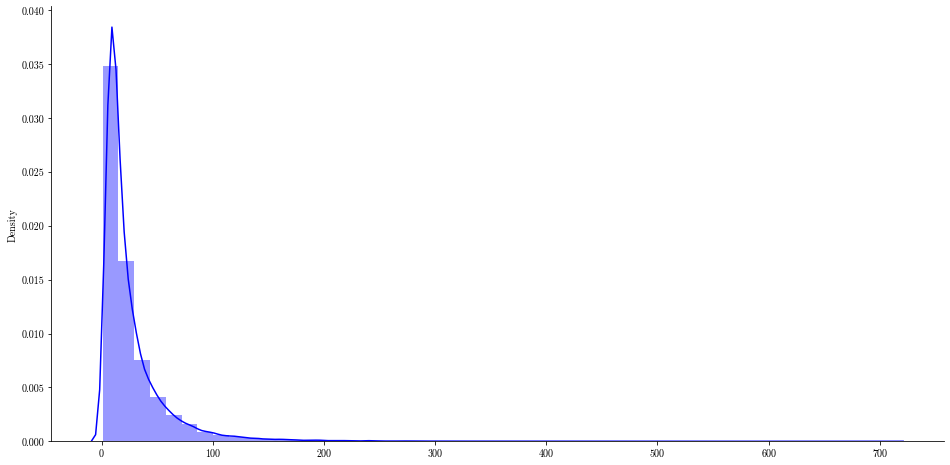

In [21]:
plt.figure(figsize=(16, 8))
sns.distplot(user_per_song.values, color='blue')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show();

In [22]:
# Numero di canzoni per utente
song_per_user = songs_df.groupby('song_id')['user_id'].count()
song_per_user

song_id
SOAAAGQ12A8C1420C8     66
SOAACPJ12A81C21360    147
SOAACSG12AB018DC80     67
SOAAEJI12AB0188AB5     62
SOAAFAC12A67ADF7EB    190
                     ... 
SOZZTNF12A8C139916    270
SOZZVWB12AB0189C30    138
SOZZWZV12A67AE140F    119
SOZZYAO12A6701FF36     76
SOZZZPV12A8C1444B5     71
Name: user_id, Length: 10000, dtype: int64

In [23]:
# Valore medio, max e min di canzoni ascoltate per utente
listens_mean = np.mean(song_per_user)  
listens_min = np.min(song_per_user)
listens_max = np.max(song_per_user)
print(f'Average listens = {listens_mean}')
print(f'Min listen = {listens_min}')
print(f'Max listens = {listens_max}')

Average listens = 200.0
Min listen = 48
Max listens = 8277


C:\Users\Giuseppe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


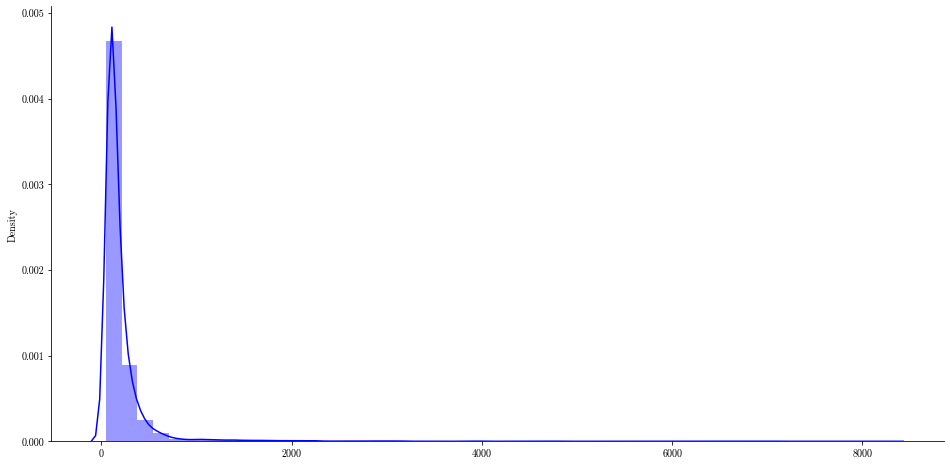

In [24]:
plt.figure(figsize=(16, 8))
sns.distplot(song_per_user.values, color='blue')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show();

In [30]:
listen_counts_reap.to_csv('listen_frequency.csv')